In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
k = 2 * np.pi / 1.0
mirror_width = 2
dmd_width = 20
field_width = 50
field_height = 50
nr_sources = 10
tilt_angle_deg = 45
tilt_angle_rad = np.deg2rad(tilt_angle_deg)

incident_angle_deg = 90
incident_angle_rad = np.deg2rad(incident_angle_deg)

resolution = 50
pixels = resolution * dmd_width

x_range = np.linspace(-field_width/2, field_width/2, pixels)
y_range = np.linspace(-field_height/2, field_height/2, pixels)

x_coords = np.linspace(0, dmd_width, nr_sources) - dmd_width/2
y_coords = np.zeros(nr_sources)

x_sources = x_coords * np.cos(tilt_angle_rad) - y_coords * np.sin(tilt_angle_rad)
y_sources = x_coords * np.sin(tilt_angle_rad) + y_coords * np.cos(tilt_angle_rad)

X, Y = np.meshgrid(x_range, y_range)

E_incident = np.exp(1j * k * (X * np.cos(incident_angle_rad) + Y * np.sin(incident_angle_rad)))

epsilon = 1e-10
E_total = np.zeros_like(X, dtype=complex)

print("still fine")

for i in range(nr_sources):
    r = np.sqrt(np.square(X - x_sources[i]) + np.square(Y - y_sources[i]))
    phase_shift = k * (x_sources[i] * np.cos(incident_angle_rad) + y_sources[i] * np.sin(incident_angle_rad))
    E_reflected = np.exp(1j * (k * r + phase_shift)) / (r + epsilon)
    E_total += E_reflected

still fine


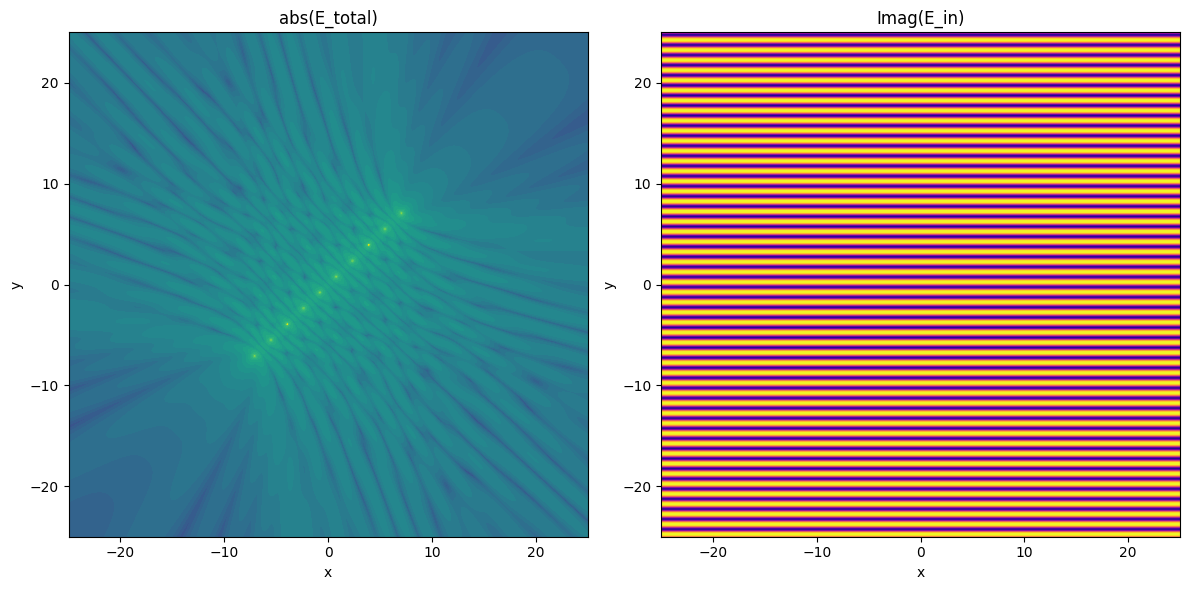

In [25]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot the real part of the total reflected field
plt.subplot(1, 2, 1)
plt.contourf(X, Y, np.log(np.abs(E_total)), levels=50, cmap='viridis')
plt.title('abs(E_total)')
plt.xlabel('x')
plt.ylabel('y')

# Plot the imaginary part of the total reflected field
plt.subplot(1, 2, 2)
# plt.contourf(x, y, np.imag((E_total)), levels=50, cmap='plasma')
plt.contourf(X, Y, np.imag((E_incident)), levels=50, cmap='plasma')
# plt.colorbar(label='Incident Field Real')
plt.title('Imag(E_in)')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()